# Project 1: Python Fundamentals for Quant Finance
### Goal
Build strong Python, NumPy, Pandas, and visualization fundamentals for options and volatility research.

---

# Project 1: Python Fundamentals for Quant Finance

## Objective
Develop the essential Python, NumPy, and Pandas skills required for quantitative trading research.  
By the end of this project, you will have built a small “Return & Volatility Explorer” notebook that downloads market data, computes returns and volatilities, and visualizes key metrics.

---

## Task 1: Core Python Syntax & Structure

### Mission 1: Daily Return Calculator
Write a function `calc_return(p0, p1)` that computes the percentage change between two prices.  
Apply it to a list of prices using both a for-loop and a list comprehension, and verify that both outputs match.



In [21]:
import numpy as np

# Single-period version
def calc_return(p0, p1):
    return round(p1 / p0 - 1, 3)

# Multi-period version
def calc_returns(prices):
    prices = np.asarray(prices, dtype=float)
    return np.round(prices[1:] / prices[:-1] - 1, 3)

import yfinance as yf
df = yf.download("AAPL", period="5d", interval="1d", auto_adjust=True)
print(df.head())

aapl_returns = calc_returns(df["Close"])
print(aapl_returns)

[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open    Volume
Ticker            AAPL        AAPL        AAPL        AAPL      AAPL
Date                                                                
2025-11-07  268.209991  272.026299  266.511626  269.538690  48227400
2025-11-10  269.429993  273.730011  267.459991  268.959991  41312400
2025-11-11  275.250000  275.910004  269.799988  269.809998  46208300
2025-11-12  273.470001  275.730011  271.700012  275.000000  48398000
2025-11-13  272.950012  276.699005  272.100006  274.269989  48475692
[[ 0.005]
 [ 0.022]
 [-0.006]
 [-0.002]]


### Mission 2: Annualized Return

#### Objective
Create a function to annualize daily returns, assuming a standard trading year of 252 days.  
You’ll use this later to summarize the long-run performance of different assets in your volatility dashboard.

---

#### Instructions

1. Define a function:
   ```python
   def annualize_return(daily_return, trading_days=252):



In [22]:
def annualize_return(daily_return, trading_days=252):
    return (1 + daily_return) ** trading_days - 1 

aapl_annualized_return = annualize_return(aapl_returns.mean())
print(aapl_annualized_return)

2.3008040670926797


### Mission 3: Safe Division with Error Handling

#### Objective
Practice writing robust, production-ready Python functions that handle common numerical errors gracefully.  
You’ll use this skill later when computing ratios like Sharpe or leverage, which often face divide-by-zero issues.

---

#### Instructions

1. Define a function that divides two numbers safely:

   def safe_divide(a, b):


In [23]:
def safe_divide(a, b):
    try:
        result = a / b
        return result
    except ZeroDivisionError:
        print("Warning: Division by zero encountered.")
    except TyperError:
        print("Warning: Invalid inpute type.")
        return np.nan

numerators = [10, 20, 30, 40]
denominators = [2, 4, 0, 5]

results = [safe_divide(a, b) for a, b in zip(numerators, denominators)]     
#zip() takes two (or more) iterables — like lists, arrays, or Series — and combines them into pairs of elements.
print(results)

[5.0, 5.0, None, 8.0]


### Mission 4: Generate Synthetic Tick Data

#### Objective
You’ll now simulate a small, realistic trade dataset to test your VWAP calculations later.  
In real markets, each “tick” (trade) has a timestamp, a price, and a volume.  
Your goal is to create a reproducible synthetic dataset that mimics this structure.

---

#### Requirements

1. **Create 20 tick observations**, each one minute apart.
   - Start from the current time using `datetime.now()`.
   - Add one minute for each tick using `timedelta(minutes=i)`.

2. **Generate realistic price and volume values.**
   - Prices should fluctuate randomly around 100 (for example, between 99 and 101).
   - Volumes should vary meaningfully — e.g., between 100 and 1000 units.

3. **Assemble the data into a Pandas DataFrame** with the columns:


First 5 prices: [100.   102.19 101.64 101.72 102.28]
Last 5 price: [100.53  98.74  99.47  99.67 100.05]
Sample mean (annualized): 0.0072
Sample vol (annualized: 0.1608


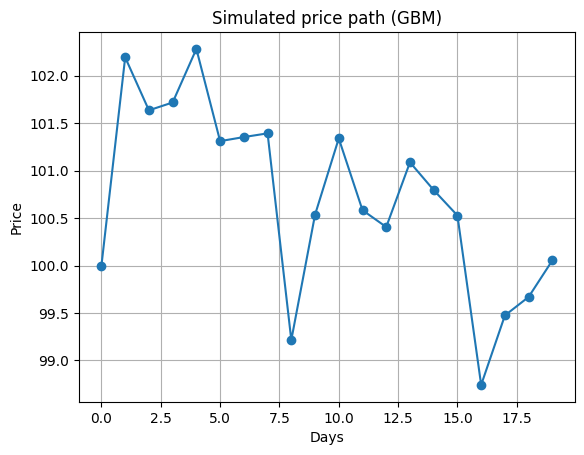

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

#create timestamps
timestamps = []
current_datetime = dt.datetime.now()

for i in range(20):
    new_time = current_datetime + dt.timedelta(minutes=i)
    timestamps.append(new_time)



# parameters
price0 = 100.0
mean = 0.12
sigma = 0.20
n_steps = 20
dt = 1.0/252

np.random.seed(7) # reproducibility

prices = [price0]

for i in range(1, n_steps):
    z = np.random.normal()   # standard normal
    log_ret = (mean - 0.5 * sigma **2) * dt + sigma * np.sqrt(dt) * z
    new_price = prices[-1] * np.exp(log_ret)
    prices.append(new_price)

# Quick checks / outputs
prices = np.array(prices)
print("First 5 prices:", np.round(prices[:5], 2))
print("Last 5 price:", np.round(prices[-5:], 2))

# Compute simulated log returns and annualize statistics for sanity check
log_returns = np.log(prices[1:]/prices[:-1])
annual_return = annualize_return(log_returns.mean())
print("Sample mean (annualized):", np.round(annual_return, 4))
print("Sample vol (annualized:", np.round(log_returns.std(ddof=1) * np.sqrt(252), 4))

# Small plot
plt.plot(prices, marker = "o")
plt.title("Simulated price path (GBM)")
plt.xlabel("Days")
plt.ylabel("Price")
plt.grid()
plt.show()

      
